In [26]:
!pip install torch torchvision torchaudio

In [27]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## IMPORT DATA

In [28]:
# Download train data from open datasets
train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())

# Download test data from open datasets
test_data = datasets.FashionMNIST(root='data', train = False, download= True, transform = ToTensor())

## Visualizing the Dataset

In [29]:
len(train_data)

60000

In [30]:
len(test_data)

10000

In [31]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

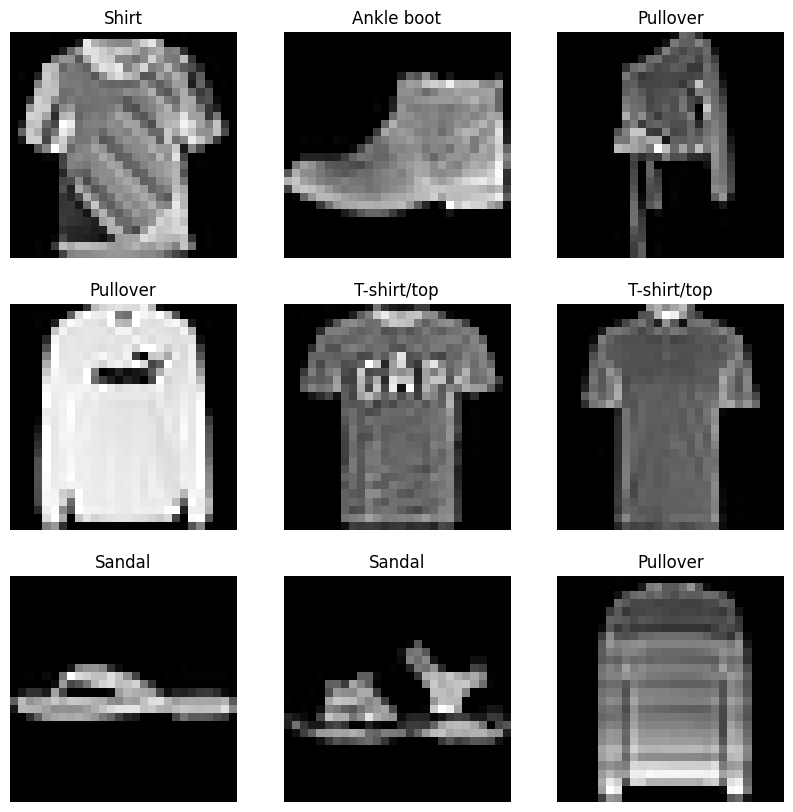

In [32]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

## Data Loader

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) <built-in method type of Tensor object at 0x78f768b85770>


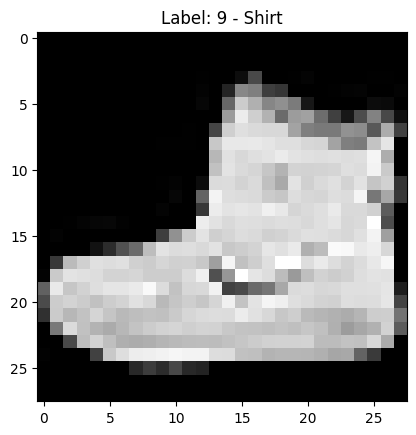

Labels batch shape: torch.Size([64])


In [33]:
from torch.utils.data import DataLoader

batch_size = 64

# Create data loader

train_dl = DataLoader(train_data, batch_size=batch_size)
test_dl = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dl:
    train_features, train_labels = next(iter(train_dl))
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.type}")

    image = train_features[0].squeeze()
    label = train_labels[0]
    sample_idx = torch.randint((label), size = (1,)).item()

    plt.title(f"Label: {label} - {class_names[sample_idx]}")
    plt.imshow(image, cmap="gray")
    plt.show()
    print(f"Labels batch shape: {train_labels.size()}")
    break

### Creating Models

In [34]:
# Check device
device ='cuda' if torch.cuda.is_available else 'cpu'
print(f'Using {device} device')

Using cuda device


In [35]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

device = "cpu"
model = NeuralNetwork().to(device)
print(model.parameters())  

<generator object Module.parameters at 0x78f763456f80>


In [36]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

NameError: name 'logits' is not defined

In [37]:
learning_rate = 1e-3
epochs = 5

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Model Performace